<a href="https://colab.research.google.com/github/pikey-msc/Python/blob/main/M3/C6_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Expresiones Regulares

Las expresiones regulares son expresiones comodín que definen patrones de caracteres a emparejar y extraer de una cadena de texto. Para entenderlo con un ejemplo, definamos “Python” como nuestra expresión regular y “Programa en Python” como nuestra cadena de texto. En este caso, nuestra cadena de texto contiene una instancia de nuestra expresión regular.

## Métodos 

El uso de las expresiones regulares en Python viene dado por el paquete re, que hay que importar a nuestro código. Algunos de los métodos proporcionados en este paquete son:

### .search()

* **re.search(patrón, cadena):** busca la primera ocurrencia de la expresión regular definida en patrón dentro del string cadena. El resultado se devuelve en un objeto Match en caso de que exista tal ocurrencia, o en un objeto None en caso contrario. Siguiendo con el ejemplo anterior:

In [ ]:
import re
re.search("Python", "Programa en Python")

<re.Match object; span=(12, 18), match='Python'>

###.findall()

* **re.findall(patrón, cadena):** devuelve una lista que contiene todas las ocurrencias de la expresión regular definida en patrón dentro del string cadena. Las ocurrencias se devuelven en el mismo orden en que se han encontrado.

In [ ]:
re.findall("Python", "Python es mi lenguaje de programación favorito, y gracias al diplomado que estoy tomando me estoy convirtiendo en todo un Pythonista.")

['Python', 'Python']

### .split()

* **re.split(separador, cadena):** divide la cadena tomando en cuenta las ocurrencias del separador. El resultado se devuelve en una lista.

In [ ]:
re.split("@","nombre.apellido@ejemplo.tld")

['nombre.apellido', 'ejemplo.tld']

## Carácteres para definir expresiones regulares

Hasta ahora hemos visto ejemplos muy simples del uso de las expresiones regulares. En este apartado vamos a ver los distintos caracteres o comodínes que podemos utilizar para formar patrones de búsqueda más complejos.

### Inicio y fin de línea: ^, $

Los símbolos de acento circunflejo (^) y dólar ($) indican que nuestro patrón de búsqueda debe contener respectivamente el inicio o fin de una línea en una cadena de texto. En el siguiente ejemplo, la expresión regular ‘^Python’ busca ocurrencias de la cadena Python al inicio de la línea, y por eso el método findall() devuelve sólo una ocurrencia a pesar de que la frase contenga dos veces la cadena ‘Python’.

In [ ]:
frase = "Python no sólo es un lenguaje de programación, Python es mi lenguaje de programacón favorito."
patron = '^Python'
re.findall(patron, frase)

['Python']

In [ ]:
frase = "Me gusta aprender Python y programar en Python"
patron = 'Python$'
re.findall(patron, frase)

['Python']

### Coincidencia de caracteres: ., \s,\S

Los símbolos ., \s y \S indican respectivamente cualquier carácter, espacio en blanco y cualquier carácter a excepción del espacio en blanco. En el siguiente ejemplo, ‘^.ython’ busca al principio de la línea (^) cualquier carácter (.) seguido por la cadena ‘ython’. Es decir, palabras como Aython, Bython, Cython, etc. a principio de línea se interpretan como una coincidencia. Sin embargo, la expresión regular ‘\s.ython’ empareja en la frase de ejemplo con ‘ Nython’ y ‘ Python’, ya que esta expresión regular busca un espacio en blanco al principio de la ocurrencia.

In [ ]:
frase = "Cython no es ningún lenguaje de programación y Nython tampoco pero Python sí"
patron = '^.ython'
palabras = re.findall(patron, frase)

In [ ]:
frase = "Cython no es ningún lenguaje de programación y Nython tampoco pero Python sí"
patron = '\\s.ython'
palabras = re.findall(patron, frase)

### Caracteres de repetición: *, +, ?

Estos tres caracteres tienen el siguiente significado:

* "*" : indica la repetición de un carácter cero o más veces.
* "+" : indica la repetición de un carácter una o más veces.
* "?" : Es el carácter reluctant o cuantificador reacio. Añadido a cualquiera de los anteriores se contará con la ocurrencia más corta posible.

El siguiente ejemplo ilustra el uso del cuantificador reacio. El primer patrón: ‘.+n’, busca cualquier repetición de caracteres que termine en ‘n’. Como la última palabra de la frase termina en ‘n’, el resultado de la búsqueda retorna la frase entera. Sin embargo, al añadir el cuantificador reacio al patrón: ‘.+?n’ el resultado de la búsqueda resulta más restrictiva ya que ésta contiene todas las secuencias de caracteres terminadas en ‘n’.

In [ ]:
frase = "Ramón y Román programan en Python"
patron = '.+n'
re.findall(patron, frase)

['Ramón y Román programan en Python']

In [ ]:
frase = "Ramón y Román programan en Python"
patron = '.+?n'
re.findall(patron, frase)

['Ramón', ' y Román', ' programan', ' en', ' Python']

### Conjunto de caracteres: [], [^]

Encerrando un conjunto de caracteres entre corchetes ([]) indica cualquiera de los caracteres especificados. Así, el patrón [abc] coincidiría con las secuencias ‘a’, ‘b’ o ‘c’. El siguiente ejemplo ilustra el uso de los corchetes. En él podemos ver que patrón ‘[CN]ython’ no encuentra coincidencia con la secuencia ‘Python’ de la frase, ya que ‘P’ no está dentro de los corchetes.

In [ ]:
frase = "Cython no es ningún lenguaje de programación y Nython tampoco pero Python sí"
patron = '[CN]ython'
re.findall(patron, frase)

['Cython', 'Nython']

El acento circunflejo (^) al principio de la secuencia entre corchetes se utiliza para indicar negación. Es decir la no coincidencia con los caracteres especificados. Un ejemplo de uso puede ser la separación de las palabras de una frase excluyendo sus signos de puntuación.

In [ ]:
frase = "¡Esto es una frase! Además contiene signos de puntuación. ¿Los eliminamos?"
patron = '[^¡!.¿? ]+'
re.findall(patron, frase)

['Esto',
 'es',
 'una',
 'frase',
 'Además',
 'contiene',
 'signos',
 'de',
 'puntuación',
 'Los',
 'eliminamos']

### Rangos de caracteres: [a-z]

Dentro de los conjuntos de caracteres también podemos especificar rangos añadiendo un guión a la secuencia. Algunos ejemplos de uso son los siguientes:

* [a-z]+ : indica una secuencia de letras minúsculas.
* [A-Z]+ : se usa para encontrar secuencias de letras mayúsculas.
* [a-zA-Z]+ : es para secuencias de letras mayúsculas o minúsculas.
* [A-Z][a-z]+ : secuencias de una letra mayúscula seguida de una o más letras mayúsculas.
* [0-9]+ : para secuencias de números de uno o más dígitos.

In [ ]:
frase = "Tengo 2 hijos que tienen 15 y 11 años"
patron = '[0-9]+'
re.findall(patron, frase)

['2', '15', '11']

### Inicio y fin de la extracción: ()

Los paréntesis ( ) no forman parte del patrón a comprobar, pero indican respectivamente dónde empieza y termina la extracción del texto. Un caso de uso es la extracción de dominios en direcciones de correo electrónico. Esta operación la podemos realizar mediante el patrón: ‘@([^ ]*)’ En este caso sabemos que el dominio viene después de un símbolo de arroba (@) que indicamos en nuestra expresión regular, seguido de una condición cerrada entre paréntesis ya que no queremos que el resultado contenga arrobas.

In [ ]:
frase = "Tengo dos correos electrónicos que son nombre.apellido@dominio.tld y nombre@dominio.com"
patron = '@([^ ]*)'
re.findall(patron, frase)

['dominio.tld', 'dominio.com']

# Procesamiento de Lenguaje Natural.
 
A los fines de este ejercicio, tomaremos el texto del hilo sobre *Robin Hood* publicado en *Twitter* por **Belén Ayala (@Bamtheory)** y que previamente he descargado gracias a un script que desarrollé para tal tarea.
 
Una vez cargado el texto del hilo, procederemos a:
 
1. ***Tokenizarlo*** (separarlo), tanto por palabras como por oraciones.
2. ***Reconocimiento de entidades***: identificar qué palabra o conjunto de palabras constituye una entidad (persona, lugar, organización).
3. ***Lematizarlo***: reducir cada palabra a su mínima expresión.
4. **POS Tagging**, es decir, asignarle a cada palabra su función gramatical (identificar cuáles son sustantivos, verbos, adjetivos y demás).
5. **Análisis de sentimiento** (quizás la tarea más interesante).
 
En caso de ser necesario, iremos graficando los resultados según corresponda. Por ejemplo, podemos hacer un gráfico de torta con las figuras de lenguaje cuando asignemos a cada palabra su función discursiva.
 
Para este ejercicio, haremos uso de tres de las principales librerías de Python para Procesamiento de Lenguaje Natural: **NLTK**, **SpaCy** y **Polyglot** (quizás pudiésemos llevar a cabo el ejercicio utilizando sólo una o dos de ellas, pero quiero aprovechar de dejarle acá nombres de librerías que puedan serles de utilidad y qué mejor que mostrarle varias para que su espectro sea más amplio), además de las herramientas tradicionales de análisis de datos como Pandas, Matplotlib, Numpy y Seaborn.

 ## Datos utilizados

In [ ]:
!rm -rf Python
!git clone https://github.com/pikey-msc/Python.git

Cloning into 'Python'...
remote: Enumerating objects: 244, done.
remote: Counting objects: 100% (244/244), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 244 (delta 84), reused 5 (delta 0), pack-reused 0
Receiving objects: 100% (244/244), 13.64 MiB | 6.38 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [ ]:
robin_hood = open('Python/M3/S6/Robin Hood.txt', 'r').read()

In [ ]:
robin_hood

'Se me callan. Si, sé que ha pasado mucho tiempo pero díganme una cosa, si Rihanna se ha tomado 5 años de algo que le DA REAL, ¿Yo no puedo descansar dos meses de esto? Para reflexionar. En fin, como los Backstreet Boys: omg I’m back again, y con la historia de Robin Hood. A ver, si hacen memoria, van a recordar que el “Robin Hood” de Disney es un zorro, y todos los personajes son animalitos del bosque. José Luis dirá: “Los zorros y los leones no tienen el mismo HÁBITAT, belen”. Tienes razón José Luis, pero estos animales son arquetipos, cállate. Esta decisión no fue simplemente una picada de culo de Disney. Sino que en verdad la película está basada en dos cosas: 1. Robin Hood (yo también estoy en shock) y 2. Renart el Zorro. Renart el zorro o Roman de Renart, son todo un conjunto de Fábulas francesas entre los siglos XII y XIII, que básicamente parodiaban las novelas épicas y generalmente tenían un tono bien sarcástico. O sea la gente antes de tener twitter, tenían las fábulas de Ren

 ## Tokenizado de oraciones y palabras:
 
Lo primero que haremos será tokenizar el texto en oraciones y en palabras.
 
Aunque parezca una tarea sencilla -podría argumentarse que donde haya un espacio termina una palabra, o donde haya un punto seguido de una palabra que comience en mayúscula indica el fin de una oración y el inicio de la siguiente-, la misma puede tener singularidades difíciles de codificar desde cero.
 
Tomemos, por ejemplo, la siguiente oración:
 
*El Sr. Ramírez ha visto un enjambre de abejas acercarse.*
 
Tenemos que Sr está seguida de un punto y Ramírez comienza en mayúscula. Aquí ya se cae el argumento que un punto seguido de una palabra que comienza en mayúscula marca el fin de una oración y el inicio de la siguiente.
 
Afortunadamente, la gran mayoría de las librerías  de Python para Procesamiento de Lenguaje Natural -por no decir todas-, cuenta con algoritmos lo suficientemente eficaces como para no cometer esos errores.
 
Para este ejercicio, utilizaremos NTLK ya que, si bien la librería *Polyglot*, relativamente más fácil de usar, cuenta con un algoritmo de tokenización, NLTK es una de las herramientas más antiguas con las que cuenta Python para el Procesamiento de Lenguaje Natural y, aunque quizás su implementación no es la más fácil para principiantes, cuenta con un soporte inmenso de usuarios y una documentación muy detallada.

 ### Importemos las librerías necesarias:

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

 Veamos cómo funciona la tokenización con un ejemplo sencillo:

In [ ]:
ejemplo = 'El Sr. Ramírez ha visto un enjambre de abejas acercarse. Asustado, corrió como nunca había corrido en su vida. Olvidó que corría directo al precipicio.'
tokenized_sentences = sent_tokenize(ejemplo)
tokenized_sentences

['El Sr. Ramírez ha visto un enjambre de abejas acercarse.',
 'Asustado, corrió como nunca había corrido en su vida.',
 'Olvidó que corría directo al precipicio.']

 Como se ve, *tokenized_sentences*, la variable en la que quedó guardada la tokenización de la frase de ejemplo, es una lista de oraciones.

 El tokenizado de palabras realiza el mismo procedimiento, con la diferencia de que devuelve una lista de palabras en lugar de oraciones:

In [ ]:
 tokenized_words = word_tokenize(ejemplo)
tokenized_words[:10] #se muestran los primeros diez items

['El',
 'Sr.',
 'Ramírez',
 'ha',
 'visto',
 'un',
 'enjambre',
 'de',
 'abejas',
 'acercarse']

Arriba podemos ver que el método tokenize de la librería NLTK es lo suficientemente hábil como para entender que Sr. -con el punto- constituye una única palabra.
 
Repitamos ambas operaciones con el texto del hilo que estamos analizando:

In [ ]:
robin_hood_tk_sent = sent_tokenize(robin_hood)
robin_hood_tk_sent[:5] #se muestran las primeras cinco oraciones

['Se me callan.',
 'Si, sé que ha pasado mucho tiempo pero díganme una cosa, si Rihanna se ha tomado 5 años de algo que le DA REAL, ¿Yo no puedo descansar dos meses de esto?',
 'Para reflexionar.',
 'En fin, como los Backstreet Boys: omg I’m back again, y con la historia de Robin Hood.',
 'A ver, si hacen memoria, van a recordar que el “Robin Hood” de Disney es un zorro, y todos los personajes son animalitos del bosque.']

In [ ]:
robin_hood_tk_words = word_tokenize(robin_hood)
robin_hood_tk_words[:20] # se muestran los primeros veinte items

['Se',
 'me',
 'callan',
 '.',
 'Si',
 ',',
 'sé',
 'que',
 'ha',
 'pasado',
 'mucho',
 'tiempo',
 'pero',
 'díganme',
 'una',
 'cosa',
 ',',
 'si',
 'Rihanna',
 'se']

Lo primero que observamos al imprimir la lista tokenizada de palabras del hilo es que los signos de puntuación forman parte de la misma.
 
Filtremos la lista para reducirla únicamente a expresiones alfanuméricas. Para esto, haremos List Comprehension<sup>1</sup> sobre la lista robin_hood_tk_words aplicando el método *.isalnum()* y guardaremos el resultado en la misma variable, sobreescribiéndola:
 
--- 
<small><sup>1</sup> Si desean ahondar más sobre *List Comprehension*, tengo un tutorial en formato *Jupyter Notebook* [aquí](https://github.com/dan-almenar/Python-List-Comprehension-Tutorial).</small>

In [ ]:
robin_hood_tk_words = [word for word in robin_hood_tk_words if word.isalnum()]
robin_hood_tk_words[:20]

['Se',
 'me',
 'callan',
 'Si',
 'sé',
 'que',
 'ha',
 'pasado',
 'mucho',
 'tiempo',
 'pero',
 'díganme',
 'una',
 'cosa',
 'si',
 'Rihanna',
 'se',
 'ha',
 'tomado',
 '5']

 Mucho mejor.

 ## Reconocimiento de entidades (*Named Entities Recognition*):
Casi todas las herramientas de Procesamiento de Lenguaje Natural cuenta con algún algoritmo de reconocimiento de entidades. Esto es, un algoritmo que es capaz de encontrar en el texto palabras o conjunto de palabras que constituyen una entidad, sea una persona, una organización, un lugar, un nombre propio -marcas, nombres de libros o publicaciones, etc.- o incluso una referencia de geolocalización.
 
Para esta parte del ejercicio, usaré la librería ***spaCy***, quizás una de las librerías más completas y relativamente fáciles de implementar  de PLN para Python.
 
### Comenzaremos por instalar la librería y las dependencias necesarias:

In [ ]:
!pip install -U spacy

     |████████████████████████████████| 6.0 MB 4.0 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 451 kB 44.1 MB/s 
     |████████████████████████████████| 628 kB 29.9 MB/s 
     |████████████████████████████████| 10.1 MB 30.5 MB/s 
     |████████████████████████████████| 181 kB 47.2 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [ ]:
# %%bash
!python -m spacy download es_core_news_lg

     |████████████████████████████████| 569.1 MB 17 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


Importamos la librería y creamos un objeto de la clase Doc, pasando el texto del hilo bajo estudio:

In [ ]:
import spacy
 
nlp = spacy.load('es_core_news_lg')
 
doc = nlp(robin_hood)
type(doc)

spacy.tokens.doc.Doc

Como vemos, la variable *doc* es un objeto del tipo *spacy.tokens.doc.Doc*, que es la estructura principal de la librería *spaCy*.
 
Dicho objeto contiene nuestro texto ya tokenizado y sobre el cuál podemos operar de múltiples formas, pero recordemos que en este ejercicio nos estamos encargando específicamente del **reconocimiento de entidades**, las cuales podemos obtener haciendo una iteración sobre la variable *doc*, filtrando los tokens que hayan sido identificados como entidades del tipo *'MISC'*:

In [ ]:
robin_hood_entities = [(tok.text, tok.label_) for tok in doc.ents if tok.label_ != 'MISC']
robin_hood_entities

[('Rihanna', 'PER'),
 ('DA REAL', 'ORG'),
 ('Backstreet Boys', 'ORG'),
 ('Robin Hood.', 'PER'),
 ('Disney', 'PER'),
 ('José Luis', 'PER'),
 ('HÁBITAT', 'LOC'),
 ('belen”', 'PER'),
 ('José Luis', 'PER'),
 ('Disney.', 'PER'),
 ('Robin Hood', 'PER'),
 ('Roman de Renart', 'PER'),
 ('Renart', 'PER'),
 ('Renart el zorro', 'PER'),
 ('Robin Hood', 'PER'),
 ('Robin Hood', 'PER'),
 ('Inglaterra', 'LOC'),
 ('Robin Hood', 'PER'),
 ('Pedro Pérez', 'PER'),
 ('Robin Hood', 'PER'),
 ('Robin Hood', 'PER'),
 ('Robin Hood', 'PER'),
 ('Robin Hood', 'PER'),
 ('PERO', 'ORG'),
 ('Howard Pyle', 'PER'),
 ('España', 'LOC'),
 ('Ajá', 'PER'),
 ('Nottingham', 'LOC'),
 ('Inglaterra', 'LOC'),
 ('Robin Hood', 'PER'),
 ('Robin', 'PER'),
 ('Robin', 'PER'),
 ('Robin', 'PER'),
 ('Robin', 'PER'),
 ('TESTOSTERONA', 'LOC'),
 ('Robin Hood', 'PER'),
 ('FORRESTLIFE', 'ORG'),
 ('Robin Hood', 'PER'),
 ('Robin', 'PER'),
 ('Robin Hood', 'PER'),
 ('Richard', 'PER'),
 ('Nottingham', 'LOC'),
 ('Robin Hood', 'PER'),
 ('Robin Hood', 'P

 Como vemos, el algoritmo ha cometido algunos errores -ningún algoritmo es 100% efectivo-. Por ejemplo, ha identificado TESTOSTERONA como un lugar (LOC), al igual que Sino (en Inglés [sino](https://en.m.wikipedia.org/wiki/Sino) es un prefijo que indica procedencia de China).
 
Llama la atención, sin embargo, que la palabra *'TESTOSTERONA'*, siendo que aparece dos veces -seguidas- en el texto del hilo, el algoritmo lo haya etiquetado como un lugar sólo en una de ellas, y le haya aplicado la etiqueta *MISC* en la otra oportunidad (sabemos que fue marcada como *misc* al no aparecer en el listado). Verifiquemos de igual modo:

In [ ]:
for tok in doc.ents:
    if 'TESTOSTERONA' in tok.text:
        print(tok.text, tok.label_)

TESTOSTERONA LOC


Acá está la razón: el algoritmo ha identificado la expresión 'Esooo TESTOSTERONA' como una entidad y luego la repetición de la palabra 'TESTOSTERONA' como *otra* entidad.
 
Sin embargo, el algoritmo ha hecho un buen trabajo identificando nombres de personas. Veamos:

In [ ]:
for tok in doc.ents:
    if tok.label_ == 'PER':
        print(tok.text, tok.label_)

Rihanna PER
Robin Hood. PER
Disney PER
José Luis PER
belen” PER
José Luis PER
Disney. PER
Robin Hood PER
Roman de Renart PER
Renart PER
Renart el zorro PER
Robin Hood PER
Robin Hood PER
Robin Hood PER
Pedro Pérez PER
Robin Hood PER
Robin Hood PER
Robin Hood PER
Robin Hood PER
Howard Pyle PER
Ajá PER
Robin Hood PER
Robin PER
Robin PER
Robin PER
Robin PER
Robin Hood PER
Robin Hood PER
Robin PER
Robin Hood PER
Richard PER
Robin Hood PER
Robin Hood PER
Robin PER
Robin Hood PER
Robin Hood PER


De una simple lectura del resultado, podemos ver que *spaCy* *pareciera* haberse equivocado al identificar la palabra 'Ajá' como persona. Veamos si es efectivamente un error del algoritmo:
 
Primero busquemos en qué oración de las que tenemos tokenizadas aparece la palabra en cuestión:

In [ ]:
for sent in robin_hood_tk_sent:
    if 'Ajá' in sent:
        print(sent)

Ajá érase una vez en un lugar llamado Nottingham en Inglaterra, vivía un forajido/pran y su banda de forajidos con los que hacía vainas ilegales y de moral dudosa pero vainas ilegales y de moral dudosa que favorecían los intereses de la gente del bosque entonces, chevere pues.


 [Ajá](https://dle.rae.es/aj%C3%A1) es una interjección, y una regla del castellano es que las interjecciones que se incorporan a un enunciado deben ser separadas con comas. Sin embargo en este caso no está siendo incorporada a una oración, sino que la sola palabra es en si misma una unidad que ha debido ser escrita entre signos de exclamación.
 
Veamos si arreglando el enunciado el algoritmo de *spaCy* cambia también la entidad:

In [ ]:
aja = '¡Ajá! Érase una vez en un lugar llamado Nottingham en Inglaterra, vivía un forajido/pran y su banda de forajidos con los que hacía vainas ilegales y de moral dudosa pero vainas ilegales y de moral dudosa que favorecían los intereses de la gente del bosque entonces, chevere pues.'
aja_spacy = nlp(aja)
for tok in aja_spacy.ents:
    if 'Ajá' in tok.text:
        print(tok.text, tok.label_)

¡Ajá! Érase MISC


Al parecer no fue un error del algoritmo sino un error ortográfico. Recordemos que estos algoritmos siguen modelos prediseñados y a partir de ellos pueden arrojar conclusiones sobre la sintaxis y morfología de un texto, pero **no constituyen un repositorio del contenido total del lenguaje ni de las formas que éste puede adoptar** (lo cual sería un absurdo), y en consecuencia, un error en la sintaxis o en la morfología *puede llevar* a conclusiones erróneas.
 
En cualquier caso, no estamos evaluando acá el correcto uso del lenguaje de  @Bamtheory, más aún teniendo en cuenta que estamos analizando mensajes transmitidos a través de una plataforma en la que en muchísimos casos la sintaxis pasa a ocupar un segundo plano.

 De momento, retomemos el ejercicio y simplemente eliminemos '*Ajá*' de los resultados de personas en el reconocimiento de entidades:

In [ ]:
robin_hood_pers = [tok for tok in doc.ents if tok.label_ == 'PER' and 'Ajá' not in tok.text]
for tok in robin_hood_pers:
    print(tok.text, tok.label_)

Rihanna PER
Robin Hood. PER
Disney PER
José Luis PER
belen” PER
José Luis PER
Disney. PER
Robin Hood PER
Roman de Renart PER
Renart PER
Renart el zorro PER
Robin Hood PER
Robin Hood PER
Robin Hood PER
Pedro Pérez PER
Robin Hood PER
Robin Hood PER
Robin Hood PER
Robin Hood PER
Howard Pyle PER
Robin Hood PER
Robin PER
Robin PER
Robin PER
Robin PER
Robin Hood PER
Robin Hood PER
Robin PER
Robin Hood PER
Richard PER
Robin Hood PER
Robin Hood PER
Robin PER
Robin Hood PER
Robin Hood PER


 Veamos cuántas veces aparece cada entidad identificada como 'PER' (persona):

In [ ]:
from collections import Counter
 
robin_hood_names = [tok.text for tok in doc.ents if tok.label_ == 'PER' and 'Ajá' not in tok.text]
pers_counter = Counter(robin_hood_names)
pers_counter = list(reversed(pers_counter.most_common()))
pers_counter

[('Richard', 1),
 ('Howard Pyle', 1),
 ('Pedro Pérez', 1),
 ('Renart el zorro', 1),
 ('Renart', 1),
 ('Roman de Renart', 1),
 ('Disney.', 1),
 ('belen”', 1),
 ('Disney', 1),
 ('Robin Hood.', 1),
 ('Rihanna', 1),
 ('José Luis', 2),
 ('Robin', 6),
 ('Robin Hood', 16)]

 Separemos en dos listas separadas los nombres de la cantidad de repeticiones de cada uno:

In [ ]:
names = [name for name, count in pers_counter]
count = [count for name, count in pers_counter]

 Finalmente, importemos *matplotlib.pyplot* a nuestro proyecto y grafiquemos el resultado:

In [ ]:
import matplotlib.pyplot as plt

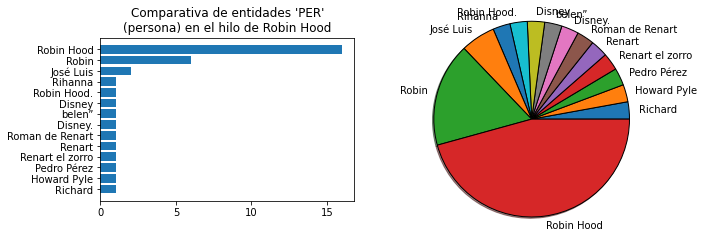

In [ ]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
barh = plt.barh(names, count)
plt.title('Comparativa de entidades \'PER\'\n(persona) en el hilo de Robin Hood')
plt.subplot(122)
pie = plt.pie(count, labels=names, wedgeprops={'edgecolor': 'black'},
              radius=1.5, shadow=True)
plt.style.use('fivethirtyeight')
plt.show()

Veamos un ejemplo de cómo podemos **representar gráficamente** la información contenida en la variable *doc* (recordemos que es un objeto de la clase Doc de spacy), mediante el método *displacy* de la librería:

In [ ]:
from spacy import displacy
 
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
robin_hood_sents = list(doc.sents)
displacy.render(robin_hood_sents[3:5], style='dep', jupyter=True, options={'compact': True, 'color': 'white', 'bg': '#000000', 'distance': 100})

In [ ]:
 displacy.render(robin_hood_sents[16], style='dep', jupyter=True, options={'color': 'white', 'bg': '#7d227b', 'distance': 95})

## Part of Speech Tagging:
 
El siguiente paso será asignarle a cada palabra de la lista *robin_hood_tk_words* su función gramatical.
 
Para realizar este proceso -conocido como *Part of Speech Tagging (POS Tagging)*- utilizaré la librería *Polyglot*, por dos razones:
1. El soporte multilingual de *Polyglot* es muy robusto, y en nuestro caso estamos analizando no sólo un texto en español, sino que además cuenta con modismos propios del locutor.
2. *Polyglot* cuenta con un algoritmo de POS Tagging sumamente eficaz ya listo para utilizar, sin necesidad de ser entrenado por el usuario.

 ### Instalemos Polyglot (y sus dependencias) e importémoslo en nuestro proyecto:

In [ ]:
!pip install polyglot
!pip install pyicu
!pip install pycld2
!pip install Morfessor

     |████████████████████████████████| 126 kB 4.0 MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52577 sha256=e612c0d2ebf3d00769ae0ac6d30af3de90499dccff7d02f53d84133d19243321
  Stored in directory: /root/.cache/pip/wheels/09/bc/67/75c9de8e9726460bc0b101ad225ad025cb8ce9e0759beb9d52
Successfully built polyglot
     |████████████████████████████████| 304 kB 3.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pyicu: filename=PyICU-2.8.1-cp37-cp37m-linux_x86_64.whl size=1375785 sha256=e3528003b99a0280e06383c9607717b84e2d9275fb4708e1029e74c76c334dbd
  Stored in directory: /root/.cache/pip/wheels/83/60/dc/4f5dffc9027a5912759aabaf918819edacfe3caffd5d31912b
Successfully built pyicu
     |████████████████████████████████| 41.4 MB 1.3 MB/s 
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86_64.whl size=9834235 sha256=d3ceb0c440c3513dd3

In [ ]:
import polyglot
from polyglot.downloader import downloader
from polyglot.text import Text

Descarguemos también los archivos necesarios para esta tarea en particular:

In [ ]:
# %%bash
!polyglot download embeddings2.es pos2.es ner2.es

[polyglot_data] Downloading package embeddings2.es to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package pos2.es to /root/polyglot_data...
[polyglot_data] Downloading package ner2.es to /root/polyglot_data...


Ya instalado *Polyglot* y todas sus dependencias pasemos, ahora sí, a realizar el *POS Tagging* del texto bajo estudio.
 
Al igual que *spaCy* tiene un tipo de objeto (Doc) en el que se realizan todas las operaciones de Procesamiento de Lenguaje Natural, *Polyglot* opera a través de objetos de tipo *Text*:

In [ ]:
text = Text(robin_hood)
type(text)

polyglot.text.Text

 Y, al igual que en *spaCy*, a partir de dicho objeto podemos ver todas las características del texto (tokenizado, entidades, POS Tags, etc.). En nuestro caso, recordemos que queremos acceder a las etiquetas POS:

In [ ]:
text.pos_tags[:20] #se muestran los primeros veinte items

[('Se', 'PRON'),
 ('me', 'PRON'),
 ('callan', 'VERB'),
 ('.', 'X'),
 ('Si', 'PROPN'),
 (',', 'PUNCT'),
 ('sé', 'VERB'),
 ('que', 'SCONJ'),
 ('ha', 'AUX'),
 ('pasado', 'VERB'),
 ('mucho', 'DET'),
 ('tiempo', 'NOUN'),
 ('pero', 'CONJ'),
 ('díganme', 'PUNCT'),
 ('una', 'DET'),
 ('cosa', 'NOUN'),
 (',', 'PUNCT'),
 ('si', 'SCONJ'),
 ('Rihanna', 'PROPN'),
 ('se', 'PRON')]

 Vemos, que ahora cada palabra cuenta con una etiqueta. En el caso particular de *Polytlog* las etiquetas corresponden al [Universal POS Tag](https://universaldependencies.org/docs/u/pos/index.html), que se reducen a las siguientes:
<ul>• ADJ: adjetivo.
• ADP: preposición.
• ADV: adverbio.
• AUX: verbo auxiliar.</ul>
<ul>• CONJ: conjunción.
• DET: artículo determinado.
• INTJ: interjección.
• NOUN: sustantivo.</ul>
<ul>• NUM: numeral.
• PART: partícula.
• PRON: pronombre.
• PROPN: pronombre personal.</ul>
<ul>• PUNCT: signos de puntuación.
• SCONJ: conjunción subordinada.
• SYM: símbolo.
<ul>• VERB: verbos.
• X: otros.</ul>
 
Existen otros sistemas, como las complejas [etiquetas EAGLE](https://www.cs.upc.edu/~nlp/tools/parole-sp.html), específicamente creadas para el castellano.
 
La idea de este ejercicio es **graficar las proporciones de cada etiqueta en el hilo de Robin Hood** y, si repitiésemos el ejercicio en cada uno de los hilos publicados por @Bamtheory, podríamos encontrar patrones de lenguaje y -en su caso- cómo dichos patrones inciden en la efectividad de los hilos (esto no es un ejercicio que vayamos a realizar, al menos de momento, pero no quería dejar de pasar la oportunidad para exponer uno de los usos que podemos darle al Procesamiento de Lenguaje Natural).

Lo siguiente que haré será eliminar del listado aquellos etiquetados como signos de puntuación, y -del resto- contar cuántas veces aparece cada pareja de (palabra, etiqueta) y agrupar ese resultado en una lista que incluya el total de dichas apariciones.
 
El resultado será una lista  que contendrá un tupple con tres valores: (palabra, etiqueta, cantidad de repeticiones) y dicho tupple aparecerá una sola vez en la lista.
 
Así, si al aplicar el *POS Tagging* una misma palabra fue etiquetada de manera distinta en diversas oportunidades, podremos verlo más fácilmente.

In [ ]:
robin_hood_tags = [(word, tag) for (word, tag) in text.pos_tags if tag !='PUNCT']
robin_hood_tags_count = list(Counter(robin_hood_tags).most_common())
robin_hood_tags_count[:10] #se muestran los diez primeros ítems

[(('de', 'ADP'), 53),
 (('y', 'CONJ'), 36),
 (('que', 'SCONJ'), 29),
 (('a', 'ADP'), 29),
 (('.', 'X'), 28),
 (('Robin', 'PROPN'), 27),
 (('el', 'DET'), 24),
 (('un', 'DET'), 20),
 (('en', 'ADP'), 20),
 (('la', 'DET'), 19)]

El resultado anterior no debería sorprendernos. Evidentemente en cualquier texto las palabras que maś repeticiones tendrán serán los artículos, conectivos, y todo el resto de conjunto de palabras no añaden contenido sino estructura al mensaje.
 
Este cúmulo de palabras, conocidas como *stopwords* o *palabras vacías*, suelen ser separadas del texto al hacer ejercicios de Procesamiento de Lenguaje Natural.
 
De las tres herramientas mencionadas a lo largo de este trabajo, NLTK es la que cuenta con un robusto glosario de *stopwords* en varios idiomas, incluido el español.
 
Descarguemos el listado e incorporémoslo a nuestro ejercicio:

In [ ]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('spanish')[:10] #se muestran los primeros diez items

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

Como medida de precaución, agreguemos a la lista de *stopwords* los signos de puntuación:

In [ ]:
stop_words = set(stopwords.words('spanish'))
punctuation = ['.', ',', ';', ':', '¿', '?', '¡', '!']
for sign in punctuation:
    stop_words.add(sign)
'!' and '¿' in stop_words

True

Bien, hemos comprobado que '!' y '¿' fueron agregadas al set de *stop_words* con lo cual queda claro que todo el listado de signos de puntuación fue añadido correctamente.
 
Pasemos entonces a eliminar del texto del hilo todas aquellas palabras que formen parte del set de *stop_words* y volvamos a enumerar las POS Tags así como la cantidad de veces que aparece cada una, simplemente sobreescribiendo la variable *robin_hood_tags* elimando los *stop_words*

In [ ]:
robin_hood_tags = [(word, tag) for (word, tag) in text.pos_tags if tag !='PUNCT']
robin_hood_tags = [(word, tag) for (word, tag) in robin_hood_tags if word not in stop_words]
robin_hood_tags_count = list(Counter(robin_hood_tags).most_common())
robin_hood_tags_count[:10] #se muestran los diez primeros ítems

[(('Robin', 'PROPN'), 27),
 (('Hood', 'PROPN'), 19),
 (('Y', 'CONJ'), 8),
 (('rey', 'NOUN'), 6),
 (('dos', 'NUM'), 4),
 (('historia', 'NOUN'), 4),
 (('bosque', 'NOUN'), 4),
 (('vez', 'NOUN'), 4),
 (('así', 'ADV'), 4),
 (('años', 'NOUN'), 3)]

Con los datos obtenidos podemos hacer nuestros propios gráficos, sin limitarnos a las visualizaciones ofrecidas por cada módulo en particular.
 
Lógicamente, tendremos que enumerar las equiquetas obtenidas y cuántas veces se obtuvo cada una, al igual que hicimos anteriormente con las entidades identificadas como personas por *spaCy*:

In [ ]:
tags = []
for (word, tag) in robin_hood_tags:
    tags.append(tag)
 
tags_count = Counter(tags)
tags_count = list(reversed(tags_count.most_common()))
tags_count

[('SYM', 2),
 ('SCONJ', 6),
 ('PRON', 9),
 ('AUX', 10),
 ('CONJ', 12),
 ('ADP', 12),
 ('DET', 13),
 ('ADV', 30),
 ('NUM', 35),
 ('X', 37),
 ('ADJ', 38),
 ('PROPN', 107),
 ('VERB', 116),
 ('NOUN', 177)]

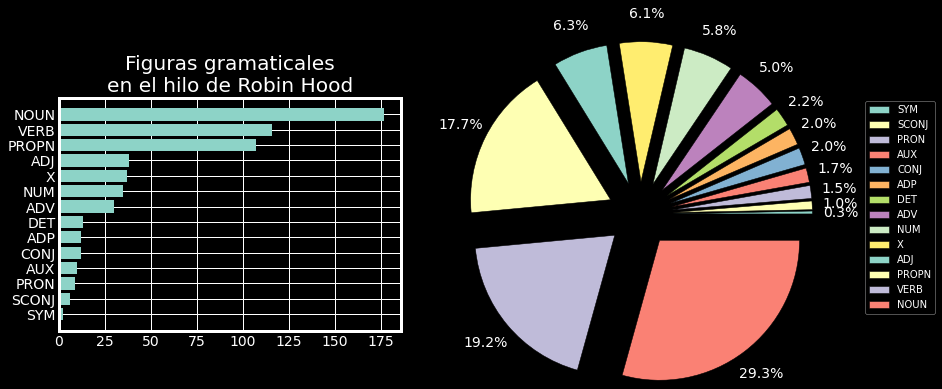

In [ ]:
labels = [tag for tag, value in tags_count]
values = [value for tag, value in tags_count]
explode = [value/value*0.35 for value in values]
plt.figure(figsize=(12, 4))
plt.subplot(121)
barh = plt.barh(labels, values)
plt.title('Figuras gramaticales\nen el hilo de Robin Hood')
plt.subplot(122)
pie = plt.pie(values, autopct='%1.1f%%',  pctdistance=1.2, wedgeprops={'edgecolor': 'black'},
              radius=1.5, explode=explode)
plt.legend(labels, loc='center right', bbox_to_anchor=(1.1,0.5), fontsize=10,
          bbox_transform=plt.gcf().transFigure)
plt.style.use('dark_background')
plt.show()

  
Bien, en este punto tenemos tres tokenizaciones (NLTK, *spaCy*, *Polyglot*), dos *NERs* y dos *POS Taggings* (*spaCy*, *Polyglot*). No está de más aclarar nuevamente que la intención de hacerlo así era mostrar un abanico de herramientas para que cada quien elija de entre ellas la que mejor le parezca según su propio proyecto.
 
Ya que las tenemos, aprovechemos de ver si existe alguna diferencia significativa entre el resultado de ambas librerías, en cuanto a *POS Tagging* se refiere:

In [ ]:
poly_tags = text.pos_tags
spacy_tags = [(token.text, token.pos_) for token in doc]
 
poly_tags == spacy_tags

False

De entrada vemos que ambas listas no son iguales, y por ello al compararlas (==) nos arroja como resultado *False*.
 
Veamos las diferencias entre los primeros cien ítems de cada lista:

In [ ]:
print('Polyglot tags:')
for tag in poly_tags[:100]:
    if tag not in spacy_tags[:100]:
        print(tag)
print(f'\nspaCy tags:')
for tag in spacy_tags[:100]:
    if tag not in poly_tags[:100]:
        print(tag)

Polyglot tags:
('.', 'X')
('Si', 'PROPN')
('pero', 'CONJ')
('díganme', 'PUNCT')
('.', 'X')
('como', 'ADP')
('omg', 'X')
('back', 'X')
('y', 'CONJ')
('.', 'X')
('es', 'VERB')
('y', 'CONJ')
('son', 'VERB')
('animalitos', 'X')
('del', 'X')
('.', 'PROPN')
('dirá', 'PROPN')

spaCy tags:
('.', 'PUNCT')
('Si', 'SCONJ')
('pero', 'CCONJ')
('díganme', 'VERB')
('que', 'PRON')
('.', 'PUNCT')
('como', 'SCONJ')
('omg', 'PROPN')
('back', 'PROPN')
('y', 'CCONJ')
('.', 'PUNCT')
('es', 'AUX')
('y', 'CCONJ')
('son', 'AUX')
('animalitos', 'NOUN')
('del', 'ADP')
('.', 'PUNCT')
('dirá', 'VERB')


 Vemos que existe cierto grado de diferencia entre uno y otro resultado y de una vista rápida no podemos aseverar que una librería haya tenido mejor desempeño que la otra, ya que en algunos casos yerra *Polyglot* y en otros el error es de *spaCy*. Le corresponde al usuario en este caso determinar qué tipo de fallos o aciertos son más determinantes para la tarea que está realizando y -nuevamente- elejir de entre al abanico de opciones disponibles. Y recuerden que siempre está también la opción de elejir alguna de las librerías no mencionadas en este trabajo, o entrenar su propio modelo de *Machine Learning* para realizar la tarea.
 
En este particular y para este ejercicio, mi voto va para *spaCy*, ya que *Polyglot* ha hecho asignaciones erróneas en algunos verbos y sustantivos, que son una parte fundamental del lenguaje.

 ## Análisis de sentimiento:
Pasemos al último apartado de este ejercicio: el **análisis de sentimiento**. En resumen, el análisis de sentimiento consiste en asignar valores (típicamente positivo/negativo o positivo/neutro/negativo) a cada palabra de una oración, para posteriormente evaluar el resultado total de la misma.
 
El resultado será un número entre 0 y 1, el cual tendrá a positivo en la medida que se acerque a 1 y a negativo en caso contrario.
 
*Polyglot* cuenta con un algoritmo prediseñado para el análisis de sentimiento en español, no así *spaCy* ni NLTK, que tendría que ser creado por el usuario cargando previamente una data (un *corpus* de palabras previamente calibradas).
 
Además, vamos a traer acá una nueva librería nueva tanto para este ejercicio como en general, ya que fue creada en febrero de este año- dedicada exclusivamente al análisis de sentimiento de textos en español: ***sentiment-analysis-spanish***.
 
Comencemos por instalar esa librería y luego hagamos el ejercicio con las dos (*Polyglot*, y *sentiment-analysis-spanish*).

In [ ]:
!pip install sentiment-analysis-spanish

     |████████████████████████████████| 30.0 MB 1.7 MB/s 


 ### Comencemos con *Polyglot*:
 
*Polyglot* trabaja con un algoritmo de doble polaridad: positivo/negativo para cada **entidad**, al cual se accede mediante los métodos *positive_sentiment* y *negative_sentiment*.
 
Descarguemos los recursos necesarios y veamos los valores asignados a cada entidad reconocida como persona ('*I-PER*') por *Polyglot*:

In [ ]:
# %%bash
!polyglot download sentiment2.es

[polyglot_data] Downloading package sentiment2.es to
[polyglot_data]     /root/polyglot_data...


In [ ]:
robin_hood_poly_sentiment = []
for sentence in text.sentences:
    for ent in sentence.entities:
        if ent.tag == 'I-PER':
            try:
                positive = ent.positive_sentiment
                negative = ent.negative_sentiment
                entity_dict = {'entity': ent[0], 'positive': positive, 'negative': negative}
                robin_hood_poly_sentiment.append(entity_dict)
                #print(f'{ent} positive sentiment: {ent.positive_sentiment}, negative sentiment: {ent.negative_sentiment}')
            except:
                pass
robin_hood_poly_sentiment[:5] #se muestran los primeros cinco ítems

[{'entity': 'Rihanna', 'negative': 0.8918918918918919, 'positive': 0},
 {'entity': 'Robin', 'negative': 0, 'positive': 0.6666666666666667},
 {'entity': 'Robin', 'negative': 0, 'positive': 0.8548387096774194},
 {'entity': 'Robin', 'negative': 0.875, 'positive': 0},
 {'entity': 'Renart', 'negative': 0, 'positive': 0.6527777777777778}]

Como se ve, hemos creado la variable *robin_hood_poly_sentiment* que contiene una lista de diccionarios, cada uno con el nombre de la entidad, su polaridad positiva y negativa. Cada entidad aparece tantas veces como ha sido encontrada por *Polyglot*, ya que la polaridad específica de cada aparición depende de la polaridad de las palabras de la oración en la que se encuentra.
 
Convirtamos esa lista de diccionarios en un *dataframe* de *Pandas*:

In [ ]:
import pandas as pd
 
df_poly_sentiment = pd.DataFrame(robin_hood_poly_sentiment)
df_poly_sentiment.head()

,entity,positive,negative
0,Rihanna,0.000000,0.891892
1,Robin,0.666667,0.000000
2,Robin,0.854839,0.000000
3,Robin,0.000000,0.875000
4,Renart,0.652778,0.000000


Habiendo convertido la lista de diccionarios en un *dataframe* nos simplifica muchísimo la tarea de graficar el análisis de sentimiento de cada (*aparición de cada*) ente.
 
Hagamos un *scatter plot* con la data obtenida:

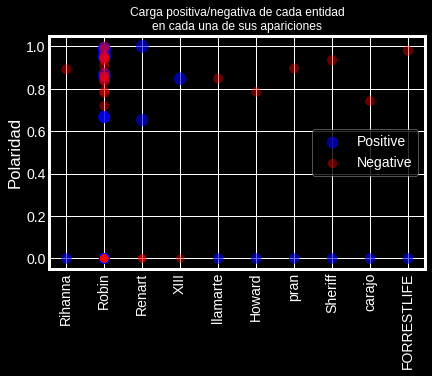

In [ ]:
plt.scatter(df_poly_sentiment['entity'], df_poly_sentiment['positive'], c='blue', s=(df_poly_sentiment['positive']+2)*50, alpha=0.6, label='Positive')
plt.scatter(df_poly_sentiment['entity'], df_poly_sentiment['negative'], c='red', s=(df_poly_sentiment['negative']+2)*30, alpha=0.4, label='Negative')
plt.legend(loc='center right')
plt.xticks(rotation=90)
plt.style.use('seaborn')
plt.ylabel('Polaridad')
plt.title('Carga positiva/negativa de cada entidad\nen cada una de sus apariciones')
plt.show()

 Unifiquemos las escalas restando al valor positivo el valor negativo obtenido en cada una, y guardemos ese resultado en otra columna del dataframe a la que llamaremos 'total'.
 
Mediante esta operación obtendremos un único resultado que irá de -1 a 1, el cual utilizaremos para hacer un nuevo gráfico de puntos.

In [ ]:
df_poly_sentiment['total'] = df_poly_sentiment['positive'] - df_poly_sentiment['negative']
df_poly_sentiment.head()

,entity,positive,negative,total
0,Rihanna,0.000000,0.891892,-0.891892
1,Robin,0.666667,0.000000,0.666667
2,Robin,0.854839,0.000000,0.854839
3,Robin,0.000000,0.875000,-0.875000
4,Renart,0.652778,0.000000,0.652778


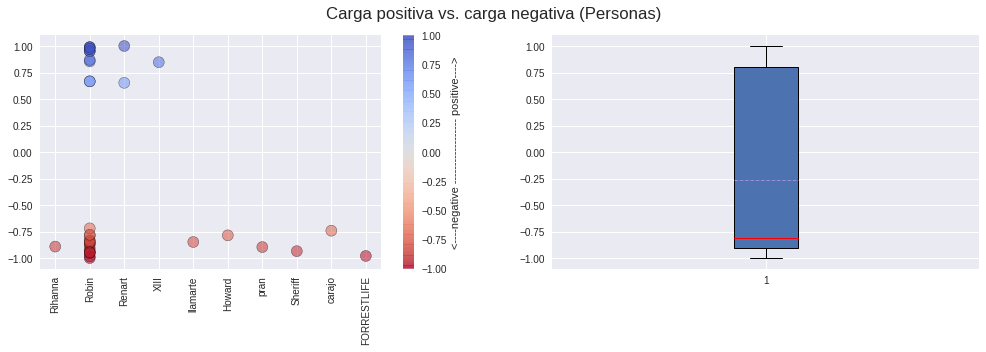

In [ ]:
plt.figure(figsize=(15, 4))
 
plt.subplot(121)
scatter = plt.scatter(df_poly_sentiment['entity'], df_poly_sentiment['total'],
                      c=df_poly_sentiment['total'], cmap='coolwarm_r', edgecolor='black',
                      linewidth=0.5, alpha=0.55, s=120)
cbar = plt.colorbar()
plt.xticks(rotation=90)
cbar.set_label('<----negative ------------------ positive---->')
 
plt.subplot(122)
boxplot  = plt.boxplot(df_poly_sentiment['total'], showmeans=True, meanline=True,
                       patch_artist=True, boxprops={'color': 'black'},
                       medianprops={'color': 'red'})
plt.suptitle('Carga positiva vs. carga negativa (Personas)')
plt.style.use('ggplot')
plt.show()

De los gráficos anteriores se evidencia que, al menos para el algoritmo de *Polyglot*, el texto del hilo de Robin Hood tiene una carga sentimental claramente negativa:
En el *scatter plot* (*izq.*) vemos lo siguiente:
1. Sólo tres de las personas identificadas por Polyglot han sido mencionadas en un contexto positivo. De esas tres personas una no lo es: el algoritmo etiquetó erróneamente XIII (siglo) como persona.
2. De las dos restantes, Robin acumula un buen número de menciones en contexto negativo, mucho más que las que ha sido nombrado en contexto positivo.
Por su parte, en el *boxplot* (*der.*) vemos que la línea media -en rojo- tiene un valor bajísimo, por debajo de -0.75.
 
Lo anterior no debe sorprendernos, ya que el texto del hilo está lleno de palabras a las que normalmente se le asigna una valoración negativa (*duelo, forajido, ladrón, robar, muerte*), por lo que el resultado era el esperado.

 ### Repitamos el ejercicio, esta vez con la librería ***sentiment-analysis-spanish***:
 
Esta librería, lanzada recientemente, tiene una implementación sumamente sencilla, que consiste básicamente en crear un objeto de la clase *SentimentAnalysisSpanish* y llamar al método *sentiment* de dicha clase, pasando cada oración como argumento (recordemos que las oraciones las tenemos ya tokenizadas en la variable *robin_hood_tk_sent*), lo que arrojará un valor entre 0 y 1, en el que a medida que el resultado tienda a cero o uno la oración tendrá, respectivamente, una carga negativa o positiva, y los valores centrales representarán oraciones de carga neutra:

In [ ]:
 from sentiment_analysis_spanish import sentiment_analysis
 
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
sas_sentiment = []
for sentence in robin_hood_tk_sent:
    polarity = sentiment.sentiment(sentence)
    sas_sentiment.append(polarity)
sas_sentiment[:5] #se muestran los primeros cinco ítems

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


[0.09000181786740202,
 6.487187616840355e-12,
 0.4513605618894927,
 0.0007511345965412985,
 0.0011175364332256443]

In [ ]:
print(len(robin_hood_tk_sent))
len(sas_sentiment)

52


52

Finalmente, podemos representar graficamente la data obtenida:

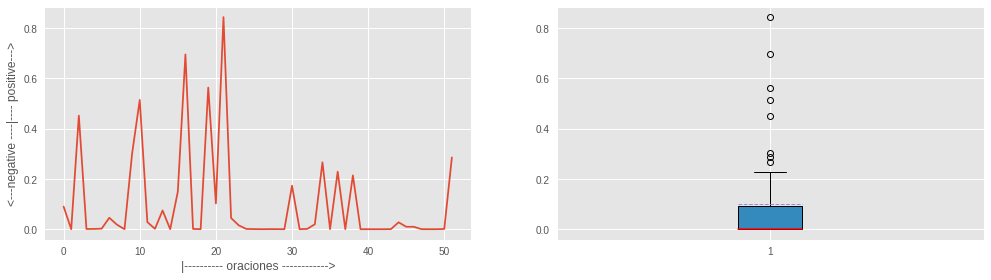

In [ ]:
plt.figure(figsize=(15, 4))
 
plt.subplot(121)
plot = plt.plot(sas_sentiment)
plt.xlabel('|---------- oraciones ------------>')
plt.ylabel('<---negative ----|---- positive--->')
 
plt.subplot(122)
boxplot  = plt.boxplot(sas_sentiment, showmeans=True, meanline=True,
                       patch_artist=True, boxprops={'color': 'black'},
                       medianprops={'color': 'red', 'linewidth': 1.5})
plt.style.use('ggplot')
plt.show()

Aquí vemos cómo se repite el resultado esperado: un análisis de sentimiento que arroja una fuerte carga negativa con una media cercana a cero, apenas algunas desviaciones que concentran en una franja neutra y sólo dos oraciones que fueron valoradas como positivas por el algoritmo de *sentiment-analysis-spanish*.

## Modelos de clasificación

Es el proceso de determinar el tono emocional detrás de una serie de palabras. La herramienta de análisis de sentimiento es una técnica automatizada para extraer información significativa de los clientes, relacionada con sus actitudes, emociones y opiniones.  

<p class="reading-options">
  <a class="btn" href="/investigating-sentiment-analysis/designing-your-own-sentiment-analysis-tool">
    <i class="fa fa-sm fa-book"></i>
    Read online
  </a>
  <a class="btn" href="/investigating-sentiment-analysis/notebooks/Designing your own sentiment analysis tool.ipynb">
    <i class="fa fa-sm fa-download"></i>
    Download notebook
  </a>
  <a class="btn" href="https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/investigating-sentiment-analysis/notebooks/Designing your own sentiment analysis tool.ipynb" target="_new">
    <i class="fa fa-sm fa-laptop"></i>
    Interactive version
  </a>
</p>

### Datos necesesarios
Los datos a bajar son:
* **sentiment140-subset.csv:** están limpios son aprox medio millos de tuits marcados como como positivos y negativos


In [ ]:
# Make data directory if it doesn't exist
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/investigating-sentiment-analysis/data/sentiment140-subset.csv.zip -P data
!unzip -n -d data data/sentiment140-subset.csv.zip

--2022-03-11 00:37:01--  https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/investigating-sentiment-analysis/data/sentiment140-subset.csv.zip
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17927149 (17M) [application/zip]
Saving to: ‘data/sentiment140-subset.csv.zip’

sentiment140-subset 100%[===================>]  17.10M  7.42MB/s    in 2.3s    

2022-03-11 00:37:04 (7.42 MB/s) - ‘data/sentiment140-subset.csv.zip’ saved [17927149/17927149]

Archive:  data/sentiment140-subset.csv.zip
  inflating: data/sentiment140-subset.csv  


In [ ]:
!pip install sklearn

## Entrenando sobre los tuits

Dado que tenemos ya marcados cuáles son positivos y negativos veremos qué letras están más asociadas a uno y a otro.
Let's say we were going to analyze the sentiment of tweets. If we had a list of tweets that were scored positive vs. negative, we could see which words are usually associated with positive scores and which are usually associated with negative scores.

Por otro lado se tiene la tabla **Sentiment140** - http://help.sentiment140.com/for-students - de 1.6 millones con un puntaje sobre negativo y positivo, la cual usaremos con ML para definir la dualidad

In [ ]:
import pandas as pd

df = pd.read_csv("data/sentiment140-subset.csv", nrows=30000)
df.head()

,polarity,text
0,0,@kconsidder You never tweet
1,0,Sick today coding from the couch.
2,1,"@ChargerJenn Thx for answering so quick,I was ..."
3,1,Wii fit says I've lost 10 pounds since last ti...
4,0,@MrKinetik Not a thing!!! I don't really have...


Polaridad es el sentimiento y text el tuit



In [ ]:
df.shape

(30000, 2)

¿Cuál es el balance?

In [ ]:
df.polarity.value_counts()

1    15064
0    14936
Name: polarity, dtype: int64

## Entrenamiento del algoritmo


### Vectorización de los tuits

Se crea un `TfidfVectorizer` y se usa para vectorizar los tuits. Dado que es una tarea grande usaremos la opción `max_features` para seleccionar sólo 1000 palabras para la prueba

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
vectors = vectorizer.fit_transform(df.text)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,10,100,11,12,15,1st,20,2day,2nd,30,...,yesterday,yet,yo,you,young,your,yourself,youtube,yum,yup
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.334095,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.427465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


### Definiendo variables

`X` son todas las característica (palabras) que se usan para predecir la dualidad,

`y` es la respuesta si es positivo o negativo usaremos `polarity` 

In [ ]:
X = words_df
y = df.polarity

### Escogiendo un algoritmo

Qué algoritmo será el más preciso, escogeremos tres:


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

### Entrenando el algoritmo

Cuando se ajusta el modelo se llama "entrenar"

In [ ]:
%%time
# Create and train a logistic regression
logreg = LogisticRegression(C=1e9, solver='lbfgs', max_iter=1000)
logreg.fit(X, y)

CPU times: user 19 s, sys: 1.07 s, total: 20.1 s
Wall time: 10.5 s


## Naive Bayes Text Classification

#### Modelo probabilístico de Clasificación

En un modelo probabilístico de clasificación queremos estimar el valor de $P(c|x)$, la probabilidad de una muestra $x$ que sea de una clase $c$. Naive Bayes usa un clasificador que usa la regla de Bayes para clasificar muestras. Naive Bayes es *ingenuo* porque asume  fuerte independencia entre todas las características de la muestras


#### Regla de Bayes:

$P(c|x) = \frac{P(x|c)P(c)}{P(x)}$

#### Clasificación de texto usando el clasificador *ingenuo* de Naive Bayes

Considerese la tarea de clasificar documentos de texto en que tengan sentimientos positivos o negativos. Diseñaremos el clasificador de Naive Bayes como sigue:

Las muestras son documentos de texto, y las características son palabras que conforman estos documentos.

- Cada documento $d$ es una sucesión de palabras, $d = w_1w_2...w_n$, donde $w_i$ son los tokens del documento y $n$ es el número total de tokens en el documento $d$.

- El conjunto de datos entrenado consiste en muchos documentos, The training dataset consists of many document, y pares ${d_i, s_i}$

- Cada documento $d_i$ está asociado con un sentimiento $s_i \in \{0,1\}$, $0$ siendo sentimientos negativos y  $1$ sentimientos positivos.

Usando la **Regla de Bayes** tenemos 

$p(s|d) = \frac{p(d|s)p(s)}{p(d|s)p(s) + p(d|\bar{s})p(\bar{s})}$

Y dada la **suposición de independencia** de las características 

$p(d|s) = p(w_1,w_2,..., w_n|s) = p(w_1|s)p(w_2|s)...p(w_n|s)$

También en el conjunto de datos que consideramos se tienen igual número de positivos y negativos conjuntos de datos.

Tenemos $p(s) = 0.5$ y $p(\bar{s})=0.5$.

Esto simplifica nuestro formulación para
$p(s|d)$

$ p(s|d) = \frac{p(d|s)}{p(d|s) + p(d|\bar{s})} $

Si asignamos un valor de referencia de
$p_T(s|d) = 0.5$ para decidir la etiqueta final, el modelo se simplifica a
$$y=1,  \text{  si } p(d|s=1) \geq p(d|s=0)$$
$$y=0 \text{ en otro caso}$$

#### Una medida numérica para la estabilidad

$p(w_i)$ será muy pequeña en magnitud, y entonces tomamos un producto de números muy pequeños para calcular $p(d|s)$. Entonces, para la estabilidad numérica, convertiremos las probabilidades a log probabilidades

$\log p(d|s) = \log p(w_1,w_2,..., w_n|s) = \log p(w_1|s) + \log p(w_2|s) + ...+ \log p(w_n|s)$

In [ ]:
%%time
# Create and train a multinomial naive bayes classifier (MultinomialNB)
bayes = MultinomialNB()
bayes.fit(X, y)

CPU times: user 261 ms, sys: 89.2 ms, total: 350 ms
Wall time: 196 ms


¿Cuál fue más rápido?

## Usando los modelos

Ya entrenados los modelos podemos usarlos

### Usando datos para la prueba

Usemos enunciados variados:

In [ ]:
# Create some test data

pd.set_option("display.max_colwidth", 200)

unknown = pd.DataFrame({'content': [
    "I love love love love this kitten",
    "I hate hate hate hate this keyboard",
    "I'm not sure how I feel about toast",
    "Did you see the baseball game yesterday?",
    "The package was delivered late and the contents were broken",
    "Trashy television shows are some of my favorites",
    "I'm seeing a Kubrick film tomorrow, I hear not so great things about it.",
    "I find chirping birds irritating, but I know I'm not the only one",
]})
unknown

,content
0,I love love love love this kitten
1,I hate hate hate hate this keyboard
2,I'm not sure how I feel about toast
3,Did you see the baseball game yesterday?
4,The package was delivered late and the contents were broken
5,Trashy television shows are some of my favorites
6,"I'm seeing a Kubrick film tomorrow, I hear not so great things about it."
7,"I find chirping birds irritating, but I know I'm not the only one"


Hay que vectorizar primero los encunciados para que el algoritmo los pueda entender el algoritmo entiende algunas palabras, ejectuar `vectorizer.get_feature_names()` para mostrar la lista de palabras que conoce:

In [ ]:
print(vectorizer.get_feature_names())

['10', '100', '11', '12', '15', '1st', '20', '2day', '2nd', '30', 'able', 'about', 'account', 'actually', 'add', 'after', 'afternoon', 'again', 'ago', 'agree', 'ah', 'ahh', 'ahhh', 'air', 'album', 'all', 'almost', 'alone', 'already', 'alright', 'also', 'although', 'always', 'am', 'amazing', 'amp', 'an', 'and', 'annoying', 'another', 'any', 'anymore', 'anyone', 'anything', 'anyway', 'app', 'apparently', 'apple', 'appreciate', 'are', 'around', 'art', 'as', 'ask', 'asleep', 'ass', 'at', 'ate', 'aw', 'awake', 'awards', 'away', 'awesome', 'aww', 'awww', 'baby', 'back', 'bad', 'band', 'bbq', 'bday', 'be', 'beach', 'beautiful', 'because', 'bed', 'been', 'beer', 'before', 'behind', 'being', 'believe', 'best', 'bet', 'better', 'big', 'bike', 'birthday', 'bit', 'bitch', 'black', 'blip', 'blog', 'blue', 'body', 'boo', 'book', 'books', 'bored', 'boring', 'both', 'bought', 'bout', 'box', 'boy', 'boys', 'break', 'breakfast', 'bring', 'bro', 'broke', 'broken', 'brother', 'brothers', 'btw', 'bus', 'bu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Cuando se vectoriza se utiliza el código:
    
```python
vectors = vectorizer.fit_transform(....)
```
Que al mismo tiempo aprende las palabras y las cuenta, en este caso ya tenemos la lista, sólo necesitamos contarla, no usaremos fit sino sólo `.transform`:

```python
unknown_vectors = vectorizer.transform(unknown.content)
unknown_words_df = ......
```



In [ ]:

unknown_vectors = vectorizer.transform(unknown.content)
unknown_words_df = pd.DataFrame(unknown_vectors.toarray(), columns=vectorizer.get_feature_names())
unknown_words_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,10,100,11,12,15,1st,20,2day,2nd,30,...,yesterday,yet,yo,you,young,your,yourself,youtube,yum,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.537291,0.0,0.0,0.244939,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


Confirmando `unknown_words_df` es 8 rows and 1,000 columns.

In [ ]:
unknown_words_df.shape

(8, 1000)

### Predicción con los modelos


Se usará `.predict` para cada modelo

```python
unknown['pred_logreg'] = logreg.predict(unknown_words_df)
```
Se puede solicitar también la probabilidad de que sea 1;

```python
unknown['pred_logreg_prob'] = linreg.predict_proba(unknown_words_df)[:,1]
```

crea la columna de predicción de probabilidad `.predict_proba`, 


* **Tip:** No olvidar el `[:,1]` después de `.predict_proba`, significa la probabilidad de la categoría `1`

In [ ]:
# Predict using all our models. 

# Logistic Regression predictions + probabilities
unknown['pred_logreg'] = logreg.predict(unknown_words_df)
unknown['pred_logreg_proba'] = logreg.predict_proba(unknown_words_df)[:,1]


# Bayes predictions + probabilities
unknown['pred_bayes'] = bayes.predict(unknown_words_df)
unknown['pred_bayes_proba'] = bayes.predict_proba(unknown_words_df)[:,1]

In [ ]:
unknown

,content,pred_logreg,pred_logreg_proba,pred_bayes,pred_bayes_proba
0,I love love love love this kitten,1,0.950516,1,0.747222
1,I hate hate hate hate this keyboard,0,0.009595,0,0.122383
2,I'm not sure how I feel about toast,0,0.180953,0,0.416819
3,Did you see the baseball game yesterday?,1,0.614999,1,0.509662
4,The package was delivered late and the contents were broken,0,0.058225,0,0.219788
5,Trashy television shows are some of my favorites,0,0.330459,1,0.534234
6,"I'm seeing a Kubrick film tomorrow, I hear not so great things about it.",1,0.558401,1,0.533493
7,"I find chirping birds irritating, but I know I'm not the only one",0,0.060197,0,0.295739


## Probando los modelos

Podemos probar con los tuits 

In [ ]:
df.head()

,polarity,text
0,0,@kconsidder You never tweet
1,0,Sick today coding from the couch.
2,1,"@ChargerJenn Thx for answering so quick,I was afraid I was gonna crash twitter with all the spamming I did 2 RR..sorry bout that"
3,1,Wii fit says I've lost 10 pounds since last time
4,0,@MrKinetik Not a thing!!! I don't really have a life.....


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
%%time

print("Training logistic regression")
logreg.fit(X_train, y_train)

print("Training Naive Bayes")
bayes.fit(X_train, y_train)

Training logistic regression
Training Naive Bayes
CPU times: user 11.5 s, sys: 2.72 s, total: 14.3 s
Wall time: 12.2 s


### Matriz de Confusión

In [ ]:
from sklearn.metrics import confusion_matrix

#### Logistic Regression

In [ ]:
y_true = y_test
y_pred = logreg.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['negative', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

,Predicted negative,Predicted positive
Is negative,2742,999
Is positive,873,2886


#### Multinomial Naive Bayes

In [ ]:
y_true = y_test
y_pred = bayes.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['negative', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

,Predicted negative,Predicted positive
Is negative,2801,940
Is positive,987,2772


### Porcentaje de matrices de confución

Veámoslo como porcentaje

#### Logisitic

#### Logistic regression

In [ ]:
y_true = y_test
y_pred = logreg.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['negative', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)

,Predicted negative,Predicted positive
Is negative,0.732959,0.267041
Is positive,0.232243,0.767757


#### Multinomial Naive Bayes

In [ ]:
y_true = y_test
y_pred = bayes.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['negative', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)

,Predicted negative,Predicted positive
Is negative,0.74873,0.25127
Is positive,0.26257,0.73743


##Ejemplo de clasificación logístico

Cargamos el dataframe

In [ ]:
df = pd.read_csv("Python/M3/S6/Reviews.csv", encoding='unicode_escape')

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Podemos observar que el dataframe contiene productos, usuarios e información de la reseña.

Los datos que más vamos a utilizar para el análisis será “Summary”, “Text” y “Score”.

* Text – Es la variable que contiene la reseña completa.
* Summary – Es el resumen de la reseña.
* Score – Es la calificación del producto provista por el cliente.

### Análisis de datos

Ahora, lo que haremos será mirar la variable “Score” para revisar si la mayoría de las calificaciones son positivas o negativas.

Para realizar esto utilizaremos la librería Plotly, que tendrás que tenerla instalada previamente

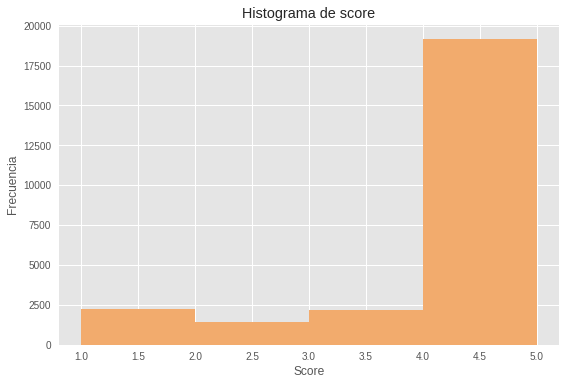

In [ ]:

import matplotlib.pyplot as plot

score = df['Score']

intervalos = [1,2,3,4,5]

plot.hist(x=score, bins=intervalos, color='#F2AB6D', rwidth=1)
plot.title('Histograma de score')
plot.xlabel('Score')
plot.ylabel('Frecuencia')

plot.show() 

Desde de acá podemos ver que la mayoría de las calificaciones de los clientes son positivas. Esto nos conlleva a pensar que la mayoría de las reseñas serán también positivas, las cuales analizaremos en breve.

Ahora crearemos la nube de palabras “wordclouds” más utilizadas en las reseñas empleando la librería “NLTK” y la librería “wordcloud”.

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

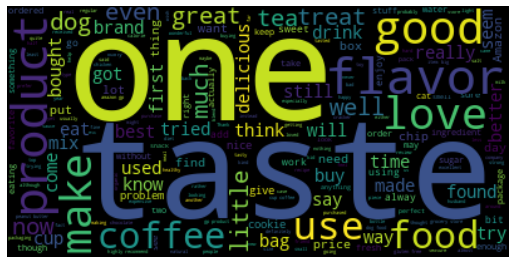

In [ ]:
#Creamos la lista de palabras

# stopwords =set(stopwords.words('english'))

stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
text = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Se puede identificar que palabras populares son “Taste”, “Love”, “Product”, “Amazon”, “One”. Estas palabras son en su mayoría positiva, lo que también nos indica que la mayoría de las reseñas del conjunto de datos expresan un sentimiento positivo.

### Clasificación de tweets

Vamos clasificar las reseñas como “positivas” y “negativas”, de esta forma podemos usarla nuestros datos como entrenamiento para nuestro modelo de clasificación de sentimiento.

Reseñas positivas serán clasificadas como +1, y reseñas negativas serán clasificadas como -1.

Clasificaremos todas las reseñas con “Score”>3 como +1, “Score” > 3 serán negativas. Se eliminarán las reseñas con “Score”=3 por que son valores neutrales. Nuestro modelo solo clasificará reseñas como positivas o negativas.

In [ ]:
df = df[df['Score']!=3]
df['sentiment'] = df['Score'].apply(lambda rating: +1 if rating > 3 else 0)

Revisando nuevamente nuestro data frame, ahora podemos observar una nueva columna llamada “sentiment”.

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


Ahora que ya hemos clasificado nuestros tweets en positivos y negativos, vamos a construir una nube de palabras para ambos casos.

Primero, crearemos dos dataframes, uno para las reseñas positivas y otro para las reseñas negativas.

In [ ]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == 0]

Generamos la nube de palabras para Positivos

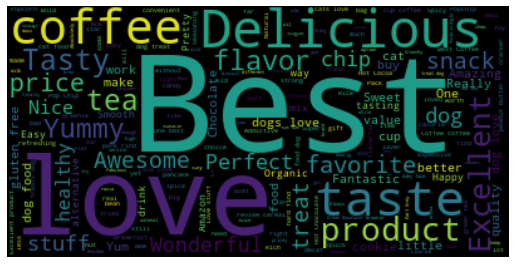

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"]) 
## good, great son removidos ya que fueron incluidos en los sentimientos negativos.

pos = " ".join(review for review in positive.Summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

Generamos la nube de palabras para Negativos

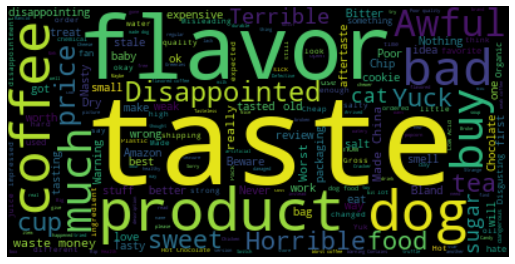

In [ ]:
neg = " ".join(str(review) for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)

plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

Tal como se muestra en las dos nubes generadas, la nube positiva refleja palabras como “love”, “best” y “delicious”, mientras que en la nube de sentimientos negativos las palabras que más aparecen son “dissapointed” y “horrible”.

Las palabras “good” y “great” inicialmente aparecían en la nube de sentimientos negativos, a pesar de ser palabras positivas. Esto se debe probablemente que estas palabras se usaron en un contexto negativo como, “not good”, “not great”. Por este motivo es que fueron removidas de la nube de palabras.

Finalmente podemos dar una mirada a la distribución de las reseñas a traves del dataset:

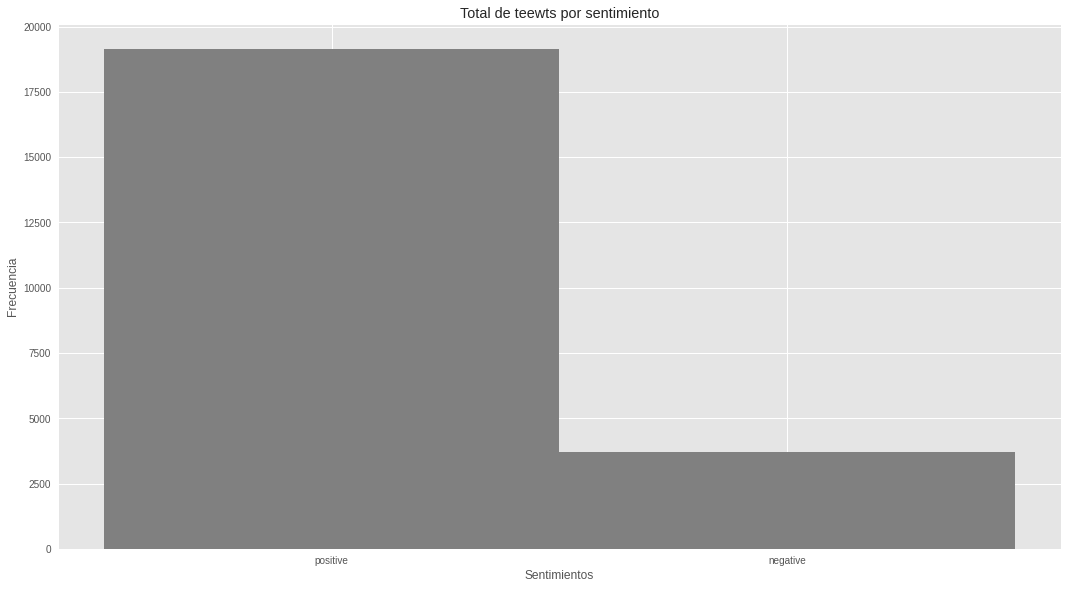

In [ ]:
df['sentimentt'] = df['sentiment'].replace({0 : 'negative', 1: 'positive'})

labels = list(df['sentimentt'].unique())
valores = list(df['sentimentt'].value_counts())
  
fig = plt.figure(figsize = (16, 9))
 
# creating the bar plot
plt.bar(labels, valores, color ='grey', width = 1)
 
plt.xlabel("Sentimientos")
plt.ylabel("Frecuencia")
plt.title("Total de teewts por sentimiento")
plt.show()

### Creación del modelo

Finalmente podemos construir el modelo de análisis de sentimiento.

Este modelo tomara las reseñas como entrada (input). Luego proporcionará una predicción si la reseña es positiva o negativa.

Esta tarea es una modelo de clasificación, por lo que entrenaremos nuestro modelo en una simple regresión logística.

#### Limpieza de dato

Estaremos usando los datos de la columna “summary” para determinar las predicciones. Primero necesitamos remover todas las puntaciones de los datos.

In [ ]:
def remove_punctuation(text):
  final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!",'"'))
  return final
  
df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)

Los nuevos datos solo deberían contar con dos columnas “Summary (reseña)” y “sentiment (target)”

In [ ]:
dfNew = df[['Summary','sentiment']]
dfNew.head()

,Summary,sentiment
0,Good Quality Dog Food,1
1,Not as Advertised,0
2,Delight says it all,1
3,Cough Medicine,0
4,Great taffy,1


Ahora solo resta dividir el dataframe para entrenamiento y para test. 80% de los datos serán empleados para entrenamiento y 20% para test.

In [ ]:
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

#### Bolsa de palabras

Ahora, usaremos el “count vectorize” de la librería Scikit-learn.

Esto transformará el texto en nuestro dataframe en una bolsa modelo de palabras, la cual contendrá una matriz dispersa de numero enteros. Se contará e imprimirá el numero de ocurrencias de cada palabra.

Necesitaremos convertir el texto en un modelo de bolsa de palabras ya que el algoritmo de regresión logística no puede entender texto.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

#### Regresión logística

Importamos el modelo de regresión logística.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Dividimos las variables independientes de la variable target

In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

Ajustamos del modelo

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

Generamos las predicciones

In [ ]:
predictions = lr.predict(X_test)

#### Test

Ahora resta realizar las pruebas para determinar la precisión del modelo.

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 412,   94],
       [ 386, 3918]])

In [ ]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.52      0.81      0.63       506
           1       0.98      0.91      0.94      4304

    accuracy                           0.90      4810
   macro avg       0.75      0.86      0.79      4810
weighted avg       0.93      0.90      0.91      4810



## Otro ejemplo de clasificación (Bayes)

In [ ]:
# pip install -U scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"\t" significa separado por tabs

In [ ]:
df = pd.read_csv('Python/M3/S6/smsspam.tsv', sep = '\t')

In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


Contamos los nulos de cada columna

In [ ]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
len(df)

5572

Vemos cuántas categorías tengo en la variable

In [ ]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
df.label.nunique()

2

Identificamos que nuestra variable respuesta (target) es binaria (1 = spam, 0 = ham)

In [ ]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
df.label.value_counts(normalize=True)*100

ham     86.593683
spam    13.406317
Name: label, dtype: float64

### Creación del modelo
Intentemos hacer un modelo de ML para predecir si un mail es spam o no basándonos sólo en las variables length y punct

In [ ]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [ ]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

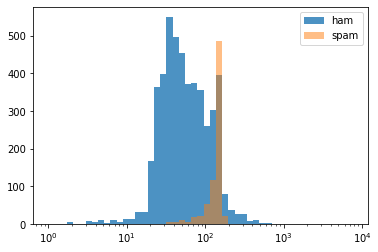

In [ ]:
%matplotlib inline
plt.xscale('log')
bins = 1.2**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'], bins = bins, alpha = 0.8)
plt.hist(df[df['label']=='spam']['length'], bins = bins, alpha = 0.5)
plt.legend(('ham', 'spam'))
plt.show()

Notemos que probablemente 'length' no baste para separar bien a los correos spam de los buenos.

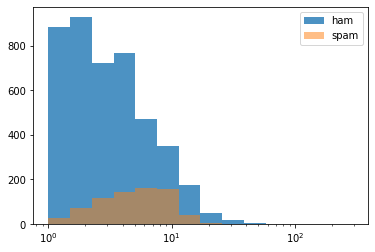

In [ ]:
%matplotlib inline
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'], bins = bins, alpha = 0.8)
plt.hist(df[df['label']=='spam']['punct'], bins = bins, alpha = 0.5)
plt.legend(('ham', 'spam'))
plt.show()

Al igual que el paso anterior observamos que 'punct' seguramente no separe bien los correos spam de los buenos ('ham').

Usaremos X para las variables predictoras (predictors, features, o xplanatory variables) e identificaremos a y como nuestra variable target (o label), es decir, nuestra variable respuesta.

In [ ]:
X = df[['length', 'punct']]
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(3733, 2)
(1839, 2)


Las predictoras como input para evaluar el modelo

In [ ]:
X_test

,length,punct
3245,147,14
944,116,1
1044,102,3
2484,45,0
812,112,4
...,...,...
4944,95,4
3313,54,2
3652,44,4
14,35,2


### Naive Bayes Text Classification

Un clasificador probabilístico que asume independencia condicional es [naïve Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes).

Dos eventos A y B son independientes si P(A|B) = P(A)
Si P(A|C) = P(A|B,C) --> A y B SON CONDICIONALMENTE INDEPENDIENTES DADO C

Una vez que conocemos C, el conocer B no me dice nada nuevo / no aporta info nueva acerca de A
en términos probabilísticos.

#### Modelo probabilístico de Clasificación

En un modelo probabilístico de clasificación queremos estimar el valor de $P(c|x)$, la probabilidad de una muestra $x$ que sea de una clase $c$. Naive Bayes usa un clasificador que usa la regla de Bayes para clasificar muestras. Naive Bayes es *ingenuo* porque asume  fuerte independencia entre todas las características de la muestras


#### Regla de Bayes:

$P(c|x) = \frac{P(x|c)P(c)}{P(x)}$

#### Clasificación de texto usando el clasificador *ingenuo* de Naive Bayes

Considerese la tarea de clasificar documentos de texto en que tengan sentimientos positivos o negativos. Diseñaremos el clasificador de Naive Bayes como sigue:

Las muestras son documentos de texto, y las características son palabras que conforman estos documentos.

- Cada documento $d$ es una sucesión de palabras, $d = w_1w_2...w_n$, donde $w_i$ son los tokens del documento y $n$ es el número total de tokens en el documento $d$.

- El conjunto de datos entrenado consiste en muchos documentos, The training dataset consists of many document, y pares ${d_i, s_i}$

- Cada documento $d_i$ está asociado con un sentimiento $s_i \in \{0,1\}$, $0$ siendo sentimientos negativos y  $1$ sentimientos positivos.

Usando la **Regla de Bayes** tenemos 

$p(s|d) = \frac{p(d|s)p(s)}{p(d|s)p(s) + p(d|\bar{s})p(\bar{s})}$

Y dada la **suposición de independencia** de las características 

$p(d|s) = p(w_1,w_2,..., w_n|s) = p(w_1|s)p(w_2|s)...p(w_n|s)$

También en el conjunto de datos de IMDb que consideramos se tienen igual número de positivos y negativos conjuntos de datos.

Tenemos $p(s) = 0.5$ y $p(\bar{s})=0.5$.

Esto simplifica nuestro formulación para
$p(s|d)$

$ p(s|d) = \frac{p(d|s)}{p(d|s) + p(d|\bar{s})} $

Si asignamos un valor de referencia de
$p_T(s|d) = 0.5$ para decidir la etiqueta final, el modelo se simplifica a
$y=
    \begin{cases}
      1, & \text{if } p(d|s=1) \geq p(d|s=0)\\
      0, & \text{otherwise}
    \end{cases}$
#### Una medida numérica para la estabilidad

$p(w_i)$ será muy pequeña en magnitud, y entonces tomamos un producto de números muy pequeños para calcular $p(d|s)$. Entonces, para la estabilidad numérica, convertiremos las probabilidades a log probabilidades

$\log p(d|s) = \log p(w_1,w_2,..., w_n|s) = \log p(w_1|s) + \log p(w_2|s) + ...+ \log p(w_n|s)$

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn import metrics
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test, predictions))

[[1583   10]
 [ 246    0]]


In [ ]:
dfcm = pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index = ['ham', 'spam'],
                   columns = ['ham', 'spam'])
dfcm

,ham,spam
ham,1583,10
spam,246,0


In [ ]:
y_test.value_counts()

ham     1593
spam     246
Name: label, dtype: int64

In [ ]:
rec = 0/246
acc = 1583 / (1593+246)
print(rec, acc)

0.0 0.8607939097335509


In [ ]:
print(metrics.accuracy_score(y_test, predictions))

0.8607939097335509


Esta medida no nos sirve (casi) de nada, porque la distribución en nuestro data set es justamente 87% de ham (0's o casos negativos) y 13% de spam (1's, o casos positivos)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.93      1593
        spam       0.00      0.00      0.00       246

    accuracy                           0.86      1839
   macro avg       0.43      0.50      0.46      1839
weighted avg       0.75      0.86      0.80      1839



NO es , en general, mejor que si hubièramos definido una regla donde el modelo clasifique a todos como "ham" ya que 86.5% de los correos son "buenos" y no estamos aprovechando la información contenida en el TEXTO del correo.

In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


## Aplicando vectorización tf-idf

In [ ]:
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_train_tfidf.shape  #--> term document matrix or document term matrix

(3733, 7082)

In [ ]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB())])
text_clf.fit(X_train, y_train) #pasando los datos de entrenamiento por el pipeline

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
pred = text_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, pred))

[[1593    0]
 [  70  176]]


In [ ]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1593
        spam       1.00      0.72      0.83       246

    accuracy                           0.96      1839
   macro avg       0.98      0.86      0.91      1839
weighted avg       0.96      0.96      0.96      1839

